In [0]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.1em; line-height: 140%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [1]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import seaborn as sb
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

# Actividad: Clasificación de SPAM

¿Podemos clasificar un email como spam con árboles y/o ensambles?

Usaremos la base de datos [UCI Spam database](https://archive.ics.uci.edu/ml/datasets/Spambase)

Responda las preguntas y realice las actividades en cada uno de los bloques

Entregas al correo phuijse@inf.uach.cl hasta el Viernes 13, 11:20 AM

Se trabajará en grupos de dos personas: se entrega un notebook completo por grupo

In [2]:
# Descargar la base de datos con wget, si usas windows usa el link de arriba
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
!head -n 5 spambase.data

--2019-09-13 00:17:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 702942 (686K) [application/x-httpd-php]
Grabando a: “spambase.data”

spambase.data       100%[===================>] 686,47K   610KB/s    en 1,1s    

2019-09-13 00:17:40 (610 KB/s) - “spambase.data” guardado [702942/702942]

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1
0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
0.06,0,0.71,0,1.23,0.19,0.19,0

**Responda**

**I)**

1. ¿Cuántos atributos tiene la base de datos? Describalos de forma muy breve
1.  Muestre un histograma de las etiquetas ¿Cuántos ejemplos hay de cada clase? ¿Es la base de datos balanceada?
1. ¿Hay valores perdidos o invalidas? 

In [3]:
data = np.genfromtxt('spambase.data', delimiter=',')

In [4]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


**Respuesta I.1**

- La tabla tiene 58 atributos en total, de los cuales el último corresponde a un identificador para saber si es spam o no.
- Entre los 57 primeros atributos, hay 48 atributos en que cada uno corresponde a una palabra: el atributo toma un valor real entre 0 y 100 para representar el porcentaje de ocurrencia de la palabra en el correo.
- Hay otros 6 atributos en que cada uno corresponde a un caracter, el atributo toma un valor real entre 0 y 100 para representar el porcentaje de ocurrencia de dicho caracter en el correo.
- Existe también un atributo que es el promedio del largo de una secuencia de letras en mayuscula y otro para la secuencia de letras mayusculas más larga. 
- Además hay uno que cuenta todas las letras mayusculas en el correo.
- Por último tenemos el identificador del correo, nos dice si es spam o no por medio de un valor booleano 1 o 0.

<IPython.core.display.Javascript object>


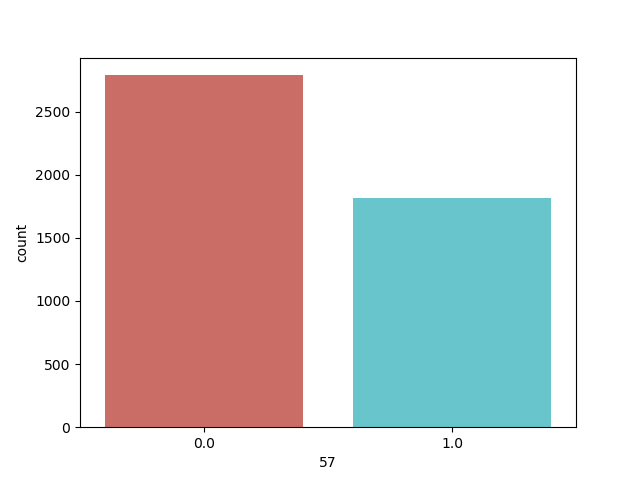

0.0    2788
1.0    1813
Name: 57, dtype: int64

In [5]:
sb.countplot(x=57, data=df, palette='hls')
df[57].value_counts()

**Respuesta I.2**

>Existen 2788 datos que están etiqutados como no-spam y 1813 que pertenecer a la clase spam. Por otro lado, podría decirse que la base de datos está medianamente balanceada ya que la diferencia de cantidad de muestras entre ambas clases no es extremadamente desequilibrada (60/40)

In [6]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

**Respuesta I.3**

>No existen valores nulos en ningun atributo de la base de datos.


**II)**
Use el conjunto de entrenamiento para entrenar y ajustar los parámetros de un 
1. árbol de decisión
1. ensamble random forest 
1. ensamble *gradient boosting*

Puede usar `GridSearchCV` para encontrar los mejores estimadores

Para este caso particular y para cada estimador responda
- ¿Qué función/criterio funciona mejor? `criterion`
- ¿Qué profundidad de árbol funciona mejor? `max_depth`
- ¿Combiene ponderar las clases? `class_weight`
- En el caso de los ensambles 
    - ¿Es recomendable usar un subconjunto aleatorio de características? `max_features`
    - ¿Cuál es la mejor cantidad de clasificadores débiles? `n_estimators`

Compare los mejores modelos de cada tipo en el conjunto de test usando métricas de clasificación apropiadas

Analice y comente sus resultados

In [7]:
X, Y = data[:, :-1], data[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, stratify=Y)

display(X.shape, Y.shape)

/home/duffi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(4601, 57)

(4601,)

### Árbol de decisión

In [8]:
params = {'class_weight':(None, 'balanced', {0:2, 1:3}, {0:3, 1:2}, {0:3, 1:1}, {0:1, 1:3}, {0:1, 1:2}, {0:2, 1:1}),
          'criterion':('entropy', 'gini'),
          'max_depth':[n for n in range(2,31,2)]}
model = tree.DecisionTreeClassifier()
clf_dt = GridSearchCV(model, params, cv=5)
clf_dt.fit(X_train, Y_train)
display(clf_dt.best_estimator_)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
            max_depth=24, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Comentario** 

- Para este clasificador resulta mejor utilizar el criterio `entropy`. En general (realizando varias pruebas) resultó mejor aplicar una ponderación para las clases con el atributo `class_weight`, ya que no están perfectamente balanceadas, por esto, resultó mejor asignar un peso balanceado para ambas clases.
- Por otro lado, el mejor tamaño del árbol `max_depth` resultó ser de 22, sin embargo, este número está dentro de un arreglo predefinido de posibilidades, por lo cual está limitado a eso. 

> Puede ser que lo descrito arriba no coincida con el resultado del modelo, esto se debe a que cada vez que se ejecuta la celda para generar el modelo, resulta en diferentes resultados, esto se debe a que cada vez se selecciona aleatoriamente diferentes dataset para entrenar. Sin embargo, los resultados están siempre dentro de un rango, por lo que tienen algun sentido concreto.

<IPython.core.display.Javascript object>


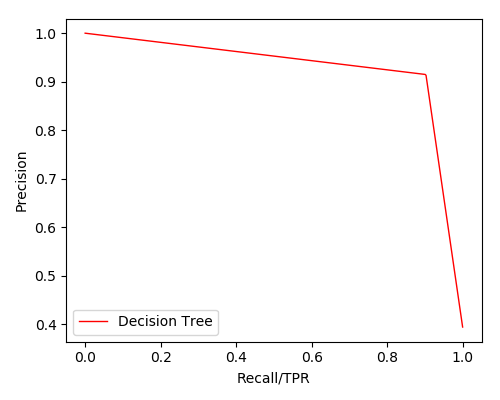

In [9]:
fig, ax = plt.subplots(1, figsize=(5, 4), tight_layout=True)
ax.set_xlabel('Recall/TPR')
ax.set_ylabel('Precision')

Y_pred = clf_dt.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, th = precision_recall_curve(Y_test, Y_pred)
ax.plot(recall, precision, 'r-',label="Decision Tree", linewidth=1)

plt.legend(loc=3);

In [10]:
Y_pred = clf_dt.best_estimator_.predict(X_test)
conf_matrix_clf = confusion_matrix(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94       697
        1.0       0.91      0.90      0.91       454

avg / total       0.93      0.93      0.93      1151



In [11]:
#MUESTRA DE RESULTADOS USANDO ENTROPY Y GINI PARA DISTINTAS PROFUNDIDADES DE ARBOL

# Crear kfold generator
fold_generator = KFold(n_splits=5)
# para cada profundidad
for max_depth in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]: 
    # crear un modelo
    model = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=max_depth)
    # crear 5 splits
    score = np.zeros(shape=(5, ))
    for fold_index, (train_index, valid_index) in enumerate(fold_generator.split(X_train)):
        # entrenar en 4 folds
        model.fit(X_train[train_index], Y_train[train_index])
        # validar en 1 fold
        score[fold_index] = model.score(X_train[valid_index], Y_train[valid_index])
    # mostrar promedio y desviación estándar de la loss
    print("profundidad %d:\tloss validación: %f +/- %f   ENTROPY" % (max_depth, np.mean(score), np.std(score)))
    
    model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                        max_depth=max_depth)
    # crear 5 splits
    score = np.zeros(shape=(5, ))
    for fold_index, (train_index, valid_index) in enumerate(fold_generator.split(X_train)):
        # entrenar en 4 folds
        model.fit(X_train[train_index], Y_train[train_index])
        # validar en 1 fold
        score[fold_index] = model.score(X_train[valid_index], Y_train[valid_index])
    # mostrar promedio y desviación estándar de la loss
    print("profundidad %d:\tloss validación: %f +/- %f   GINI" % (max_depth, np.mean(score), np.std(score)) + " \n")

profundidad 2:	loss validación: 0.813913 +/- 0.006121   ENTROPY
profundidad 2:	loss validación: 0.821449 +/- 0.008168   GINI 

profundidad 4:	loss validación: 0.896522 +/- 0.008431   ENTROPY
profundidad 4:	loss validación: 0.895362 +/- 0.007469   GINI 

profundidad 6:	loss validación: 0.902319 +/- 0.006257   ENTROPY
profundidad 6:	loss validación: 0.907246 +/- 0.006011   GINI 

profundidad 8:	loss validación: 0.912174 +/- 0.005912   ENTROPY
profundidad 8:	loss validación: 0.911884 +/- 0.007636   GINI 

profundidad 10:	loss validación: 0.918841 +/- 0.006859   ENTROPY
profundidad 10:	loss validación: 0.912754 +/- 0.005826   GINI 

profundidad 12:	loss validación: 0.915652 +/- 0.008270   ENTROPY
profundidad 12:	loss validación: 0.913623 +/- 0.006121   GINI 

profundidad 14:	loss validación: 0.908696 +/- 0.008981   ENTROPY
profundidad 14:	loss validación: 0.910435 +/- 0.004798   GINI 

profundidad 16:	loss validación: 0.908696 +/- 0.006798   ENTROPY
profundidad 16:	loss validación: 0.91130

### Gradient boosting

In [12]:
params = {'loss':('deviance', 'exponential'), 
          'max_depth':[1, 3, 5, 7],
          'n_estimators': [n for n in range(75,151,25)],
          'max_features':[10, 20, 30, 40, 57]}
model = ensemble.GradientBoostingClassifier(subsample=0.5, learning_rate=0.1, max_features=None)
gbs = GridSearchCV(model, params, cv=5)
gbs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ('deviance', 'exponential'), 'max_depth': [1, 3, 5, 7], 'n_estimators': [75, 100, 125, 150], 'max_features': [10, 20, 30, 40, 57]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
means = gbs.cv_results_['mean_test_score'][gbs.cv_results_['param_loss']== 'deviance']
stds = gbs.cv_results_['std_test_score'][gbs.cv_results_['param_loss']== 'deviance']
for mean, std, params in zip(means, stds, gbs.cv_results_['params']):
    print("score: %0.3f (+/-%0.03f) con %r" % (mean, std * 2, params))

score: 0.919 (+/-0.032) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 10, 'n_estimators': 75}
score: 0.926 (+/-0.029) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 10, 'n_estimators': 100}
score: 0.931 (+/-0.025) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 10, 'n_estimators': 125}
score: 0.932 (+/-0.030) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 10, 'n_estimators': 150}
score: 0.925 (+/-0.025) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 20, 'n_estimators': 75}
score: 0.928 (+/-0.026) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 20, 'n_estimators': 100}
score: 0.932 (+/-0.029) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 20, 'n_estimators': 125}
score: 0.933 (+/-0.025) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 20, 'n_estimators': 150}
score: 0.923 (+/-0.025) con {'loss': 'deviance', 'max_depth': 1, 'max_features': 30, 'n_estimators': 75}
score: 0.929 (+/-0.028) con {'loss': 'deviance', 

In [14]:
model = gbs.best_estimator_
print(model)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=7,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=125,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)


**Comentario**
- Respecto a este modelo podemos concluir que el mejor criterio a utilizar es `friedman_mse`, sin embargo existe el criterio `mae` pero al momento de intentar usarlo, el método tardó demasiado en ejecutarse, y finalmente lo interrumpimos.

- Por otro lado la máxima profundidad de los árboles es de `7` pero incluso podría ser más, el problema es que el tiempo de ejecución se extiende demasiado, pero esto puede resultar beneficioso para el modelo.
- El atributo `max_features` influye positivamente al modelo cuando este aumenta hasta considerar todos los atributos, y la cantidad de arboles es de `125`. Es necesario mencionar que en este método el atributo `class_weight` no es influyente.
- Como punto extra, el atributo subsample que forma parte del modelo hace mejorar este cuando es inferior a uno, disminuye la varianza, mejorando el clasificador resultante.

<IPython.core.display.Javascript object>


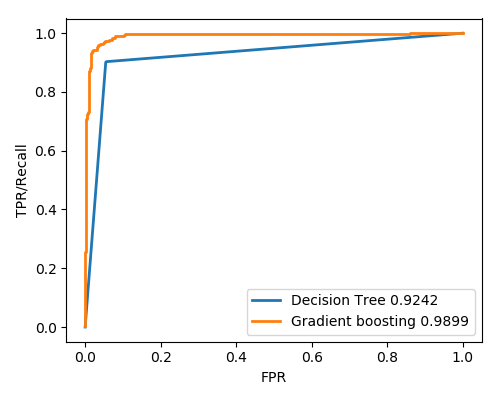

In [15]:
fig, ax = plt.subplots(1, figsize=(5, 4), tight_layout=True)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR/Recall')

Y_pred = clf_dt.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(Y_test, Y_pred)
ax.plot(fpr, tpr, label="Decision Tree %0.4f" %auc(fpr, tpr), linewidth=2)

Y_pred = gbs.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(Y_test, Y_pred)
ax.plot(fpr, tpr, label="Gradient boosting %0.4f" %auc(fpr, tpr), linewidth=2)
plt.legend(loc=4);

In [20]:
Y_pred = gbs.best_estimator_.predict(X_test)
#conf_matrix_gbs = confusion_matrix(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.97       697
        1.0       0.95      0.94      0.95       454

avg / total       0.96      0.96      0.96      1151



**Comentario**
En general, observando los resultados del reporte de clasificación, se obtienen mejores resultados que en el arbol normal, sobretodo observando el f1-score, que es más significativo en estos casos, además en el gráfico también se ve representado esto.

### Random Forest

In [21]:
params = {'class_weight':(None, 'balanced',{0:0.6,1:0.4},{0:0.4,1:0.6}),
          'criterion':('entropy', 'gini'),
          'max_depth':[n for n in range(2,27,2)],
          'n_estimators': [10, 20, 50, 100]}
model = ensemble.RandomForestClassifier(max_features='auto', n_jobs=-1)
rfs = GridSearchCV(model, params, cv=5)
rfs.fit(X_train, Y_train)
display(rfs.best_estimator_, rfs.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9518840579710145

Se observa que al correr el algoritmo varias veces, arroja distintos "mejores resultados", por ejemplo, arrojó:
- class_weight = None; criterion = ? ; max_depth = 20; estimators = 50
- class_weight = None; criterion = ? ; max_depth = 16; estimators = 50; best_score_ = ~0.95
- class_weight = None; criterion = ? ; max_depth = 14; estimators = 100; best_score_ = ~0.94
- class_weight = None; criterion = entropy ; max_depth = 16; estimators = 100; best_score_ = ~0.95
- class_weight = Balanced; criterion = entropy; max_depth = 26; estimators = 50; best_score_ = ~0.96
- class_weight = None; criterion = entropy; max_depth = 26; estimators = 100; best_score_ = ~0.95

In [22]:
Y_pred = rfs.best_estimator_.predict(X_test)
# conf_matrix_rfs = confusion_matrix(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97       697
        1.0       0.96      0.94      0.95       454

avg / total       0.96      0.96      0.96      1151



<IPython.core.display.Javascript object>


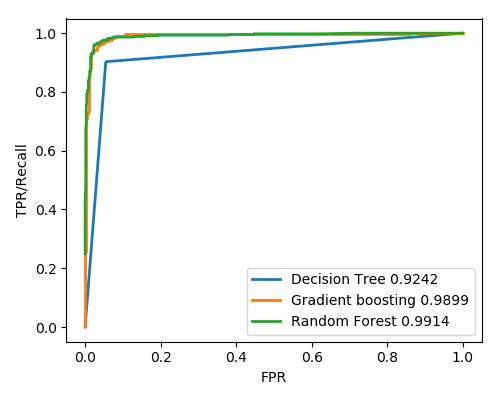

In [24]:
fig, ax = plt.subplots(1, figsize=(5, 4), tight_layout=True)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR/Recall')

Y_pred = clf_dt.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(Y_test, Y_pred)
ax.plot(fpr, tpr, label="Decision Tree %0.4f" %auc(fpr, tpr), linewidth=2)

Y_pred = gbs.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(Y_test, Y_pred)
ax.plot(fpr, tpr, label="Gradient boosting %0.4f" %auc(fpr, tpr), linewidth=2)

Y_pred = rfs.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(Y_test, Y_pred)
ax.plot(fpr, tpr, label="Random Forest %0.4f" %auc(fpr, tpr), linewidth=2)
plt.legend(loc=4);

**Comentario final**

- Luego de estudiar el comportamiento de estos 3 algoritmos de clasificación, observamos que el que obtuvo mayor área bajo la curva (AUC) y por ende el mejor resultado fue *Random Forest*.
- Recordando lo visto en clases, se obtuvieron resultados en el mismo orden de desempeño, es decir, 1º Random Forest, 2º Gradient Boosting y 3ª Decision Tree.